# <hl> Week 3 Assignment
**Author:** Demetria Murphy
    
**Description:** In this assignment, I will be exploring both the 1940 and 1960 Census data for race by Census tract to better understand the racial demographics both before and after racially restrictive covenants were outlawed.
    
**Data Source:** Philip J. Ethington, Anne Marie Kooistra, and Edward DeYoung, *Los Angeles County Union Census Tract Data Series, 1940-1990*, Version 1.01. Created with the support of the John Randolph Haynes and Dora Haynes Foundation. (Los Angeles: University of Southern California, 2000).

In [1]:
import pandas as pd

In [2]:
import geopandas as gpd

In [3]:
df = gpd.read_file('../Data/ethington.zip')

# <hl> Data Exploration

Let's take a first look at the size of our data...

In [4]:
df.head()

,AREA,PERIMETER,CTBNA,P40T,P40WNH,P40BNH,P40ONH,P40HIS,P40TW,P40NATW,...,O90BC,R90SH85,R90SC85,R90OT85,H90TOT,H90SFU,H90OTH,INC90MED,H90MVL,geometry
0,5.110526e+08,97788.60030,900100,615,605,1,3,6,611,568,...,2728.0,2920.0,6009.0,1962.0,3839.0,3691.0,148.0,38150.0,116448.0,"POLYGON ((2010981.306 627195.895, 2010985.562 ..."
1,4.139640e+08,112335.98215,900200,1312,1287,2,11,12,1299,1220,...,380.0,846.0,556.0,201.0,566.0,487.0,79.0,34600.0,123655.0,"POLYGON ((2020599.176 646773.950, 2020593.421 ..."
2,9.627060e+08,143092.75454,901202,1063,1038,1,20,4,1042,938,...,799.0,1084.0,1628.0,748.0,1435.0,1197.0,238.0,43799.0,152655.0,"POLYGON ((1970302.753 633587.024, 1970303.702 ..."
3,2.129940e+08,60542.54667,900900,1150,1122,3,14,10,1132,1055,...,608.0,968.0,1092.0,339.0,960.0,667.0,293.0,36702.0,161744.0,"POLYGON ((1970159.706 646429.761, 1970530.071 ..."
4,5.892047e+07,38184.45935,900300,522,511,2,5,5,516,487,...,454.0,902.0,731.0,252.0,816.0,421.0,395.0,24976.0,139873.0,"POLYGON ((1987195.131 635140.066, 1987161.766 ..."


In [5]:
df.shape

(1656, 252)

This data file contains 252 different variables for 1656 Census tracts in Los Angeles County from 1940-1990. *Wow!* This will be so helpful to understand the surrounding Los Angeles landscape from both before and after racially restrictive covenants became outlawed in 1948.

Let's view a sample:

In [6]:
df.sample

<bound method NDFrame.sample of               AREA     PERIMETER   CTBNA  P40T  P40WNH  P40BNH  P40ONH  \
0     5.110526e+08   97788.60030  900100   615     605       1       3   
1     4.139640e+08  112335.98215  900200  1312    1287       2      11   
2     9.627060e+08  143092.75454  901202  1063    1038       1      20   
3     2.129940e+08   60542.54667  900900  1150    1122       3      14   
4     5.892047e+07   38184.45935  900300   522     511       2       5   
...            ...           ...     ...   ...     ...     ...     ...   
1651  1.686172e+06    6307.33871  297500  2700    2642      37       9   
1652  1.913036e+08  102213.08792  599100   881     854       3       3   
1653  6.157495e+03     300.98181  599100   881     854       3       3   
1654  3.657815e+06    8930.92607  599000  1637    1548      18       8   
1655  1.782907e+08   87525.31085  599100   881     854       3       3   

      P40HIS  P40TW  P40NATW  ...   O90BC  R90SH85  R90SC85  R90OT85  H90TOT  \

What types of data do we have in this dataset?

In [7]:
df.info(verbose=True, null_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 252 columns):
 #    Column     Non-Null Count  Dtype   
---   ------     --------------  -----   
 0    AREA       1656 non-null   float64 
 1    PERIMETER  1656 non-null   float64 
 2    CTBNA      1656 non-null   int64   
 3    P40T       1656 non-null   int64   
 4    P40WNH     1656 non-null   int64   
 5    P40BNH     1656 non-null   int64   
 6    P40ONH     1656 non-null   int64   
 7    P40HIS     1656 non-null   int64   
 8    P40TW      1656 non-null   int64   
 9    P40NATW    1656 non-null   int64   
 10   P40FBW     1656 non-null   int64   
 11   P40TOTNW   1656 non-null   int64   
 12   P40B       1656 non-null   int64   
 13   P40NBNW    1656 non-null   int64   
 14   P40MEX     1656 non-null   int64   
 15   P40CSA     1656 non-null   int64   
 16   E40H       1656 non-null   int64   
 17   E40C       1656 non-null   int64   
 18   O40WC      1656 non-null   int64   
 1

/tmp/ipykernel_411/2612161665.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


In [8]:
df.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 252 columns):
 #    Column     Non-Null Count  Dtype   
---   ------     --------------  -----   
 0    AREA       1656 non-null   float64 
 1    PERIMETER  1656 non-null   float64 
 2    CTBNA      1656 non-null   int64   
 3    P40T       1656 non-null   int64   
 4    P40WNH     1656 non-null   int64   
 5    P40BNH     1656 non-null   int64   
 6    P40ONH     1656 non-null   int64   
 7    P40HIS     1656 non-null   int64   
 8    P40TW      1656 non-null   int64   
 9    P40NATW    1656 non-null   int64   
 10   P40FBW     1656 non-null   int64   
 11   P40TOTNW   1656 non-null   int64   
 12   P40B       1656 non-null   int64   
 13   P40NBNW    1656 non-null   int64   
 14   P40MEX     1656 non-null   int64   
 15   P40CSA     1656 non-null   int64   
 16   E40H       1656 non-null   int64   
 17   E40C       1656 non-null   int64   
 18   O40WC      1656 non-null   int64   
 1

**Important Note:** Despite much of the data characterized as float, we know based on the data sample that it is likely there is a .0 on most if not all the values. This means that the data is really integers, but Python is reading it as "float64."

Let's take a look at the census tract number column. This will be the identifier for the spatial unit within the scope of this project.

In [9]:
df.CTBNA.head()

0    900100
1    900200
2    901202
3    900900
4    900300
Name: CTBNA, dtype: int64

# <hl> Shapefile Attributes

We know our file is a shapefile, so let's import the necessary packages to work with our data file.

In [10]:
import os
import matplotlib.pyplot as plt

Let me check which version of Python is running here to find supporting documentation for exploring a shapefile.

In [11]:
from platform import python_version

print(python_version())

3.9.6


Here are the geometric columns used that will plot this spatial dataset.

In [12]:
df.AREA.head()

0    5.110526e+08
1    4.139640e+08
2    9.627060e+08
3    2.129940e+08
4    5.892047e+07
Name: AREA, dtype: float64

In [13]:
df.PERIMETER.head()

0     97788.60030
1    112335.98215
2    143092.75454
3     60542.54667
4     38184.45935
Name: PERIMETER, dtype: float64

Let's run an initial plot.

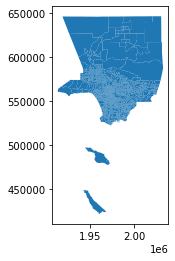

In [14]:
df.plot()
plt.show()

This shape is familiar...the shape of Los Angeles County. Seems like our data is working!

# <hl> Dropping Columns 
 1. Null 
 2. by Name (to columns used on variable list]

In [15]:
df.columns[df.all()].tolist()

['AREA',
 'PERIMETER',
 'CTBNA',
 'P40T',
 'P40WNH',
 'P40TW',
 'P70T',
 'A701864',
 'A70MEDN',
 'E70H',
 'E70OTH',
 'O70WC',
 'O70BC',
 'P80T',
 'P80WNH',
 'P80HIS',
 'A801864',
 'A80MEDN',
 'P90T',
 'P90WNH',
 'A901864',
 'A90MEDN',
 'geometry']

Some of these are important columns such as 'P40T', 'AREA', 'PERIMETER' and 'geometry' which we need to plot. *Why are these showing up as null?* Let's try dropping all the columns we do not need, all variables from 1970-1990, by name.

In [16]:
columns_to_drop70 = ['P70T','P70WNH', 'P70BNH', 'P70ONH','P70HIS', 'A700004', 'A700517', 'A701864', 'A7065UP', 'A70MEDN', 'M70SINGL', 'M70MAR', 'M70OTH', 'E70C', 'E70H', 'E70OTH', 'O70WC', 'O70BC', 'R70SH65', 'R70SC65', 'R70OT65', 'H70TOT', 'H70SFU', 'H70OTH', 'INC70MED', 'H70MVL', 'H70MRN']
columns_to_drop80 = ['P80T', 'P80WNH', 'P80BNH', 'P80ONH', 'P80HIS', 'A800004', 'A800517', 'A801864', 'A8065UP', 'A80MEDN', 'M80SINGL', 'M80MAR', 'M80OTH', 'E80C', 'E80H', 'E80OTH', 'O80WC', 'O80BC', 'R80SH75', 'R80SC75', 'R80OT75', 'H80TOT', 'H80SFU', 'H80OTH', 'INC80MED', 'H80MVL', 'H80MRN']
columns_to_drop90 = ['P90T', 'P90WNH', 'P90BNH', 'P90ONH', 'P90HIS', 'A900004', 'A900517', 'A901864', 'A9065UP', 'A90MEDN', 'M90SINGL', 'M90MAR', 'M90OTH', 'E90C', 'E90H', 'E90OTH', 'O90WC', 'O90BC', 'R90SH85', 'R90SC85', 'R90OT85', 'H90TOT', 'H90SFU', 'H90OTH', 'INC90MED', 'H90MVL']

In [17]:
df = df.drop(columns_to_drop70,axis=1)
df.head()

,AREA,PERIMETER,CTBNA,P40T,P40WNH,P40BNH,P40ONH,P40HIS,P40TW,P40NATW,...,O90BC,R90SH85,R90SC85,R90OT85,H90TOT,H90SFU,H90OTH,INC90MED,H90MVL,geometry
0,5.110526e+08,97788.60030,900100,615,605,1,3,6,611,568,...,2728.0,2920.0,6009.0,1962.0,3839.0,3691.0,148.0,38150.0,116448.0,"POLYGON ((2010981.306 627195.895, 2010985.562 ..."
1,4.139640e+08,112335.98215,900200,1312,1287,2,11,12,1299,1220,...,380.0,846.0,556.0,201.0,566.0,487.0,79.0,34600.0,123655.0,"POLYGON ((2020599.176 646773.950, 2020593.421 ..."
2,9.627060e+08,143092.75454,901202,1063,1038,1,20,4,1042,938,...,799.0,1084.0,1628.0,748.0,1435.0,1197.0,238.0,43799.0,152655.0,"POLYGON ((1970302.753 633587.024, 1970303.702 ..."
3,2.129940e+08,60542.54667,900900,1150,1122,3,14,10,1132,1055,...,608.0,968.0,1092.0,339.0,960.0,667.0,293.0,36702.0,161744.0,"POLYGON ((1970159.706 646429.761, 1970530.071 ..."
4,5.892047e+07,38184.45935,900300,522,511,2,5,5,516,487,...,454.0,902.0,731.0,252.0,816.0,421.0,395.0,24976.0,139873.0,"POLYGON ((1987195.131 635140.066, 1987161.766 ..."


In [18]:
df = df.drop(columns_to_drop80,axis=1)
df.head()

,AREA,PERIMETER,CTBNA,P40T,P40WNH,P40BNH,P40ONH,P40HIS,P40TW,P40NATW,...,O90BC,R90SH85,R90SC85,R90OT85,H90TOT,H90SFU,H90OTH,INC90MED,H90MVL,geometry
0,5.110526e+08,97788.60030,900100,615,605,1,3,6,611,568,...,2728.0,2920.0,6009.0,1962.0,3839.0,3691.0,148.0,38150.0,116448.0,"POLYGON ((2010981.306 627195.895, 2010985.562 ..."
1,4.139640e+08,112335.98215,900200,1312,1287,2,11,12,1299,1220,...,380.0,846.0,556.0,201.0,566.0,487.0,79.0,34600.0,123655.0,"POLYGON ((2020599.176 646773.950, 2020593.421 ..."
2,9.627060e+08,143092.75454,901202,1063,1038,1,20,4,1042,938,...,799.0,1084.0,1628.0,748.0,1435.0,1197.0,238.0,43799.0,152655.0,"POLYGON ((1970302.753 633587.024, 1970303.702 ..."
3,2.129940e+08,60542.54667,900900,1150,1122,3,14,10,1132,1055,...,608.0,968.0,1092.0,339.0,960.0,667.0,293.0,36702.0,161744.0,"POLYGON ((1970159.706 646429.761, 1970530.071 ..."
4,5.892047e+07,38184.45935,900300,522,511,2,5,5,516,487,...,454.0,902.0,731.0,252.0,816.0,421.0,395.0,24976.0,139873.0,"POLYGON ((1987195.131 635140.066, 1987161.766 ..."


In [19]:
df = df.drop(columns_to_drop90,axis=1)
df.head()

,AREA,PERIMETER,CTBNA,P40T,P40WNH,P40BNH,P40ONH,P40HIS,P40TW,P40NATW,...,O6013,H60TOT,H60NWT,H60OWN,H60NWO,H60RNT,H60NRN,H60MVL,H60MRN,geometry
0,5.110526e+08,97788.60030,900100,615,605,1,3,6,611,568,...,13,634,39,136,24,57,15,0,0,"POLYGON ((2010981.306 627195.895, 2010985.562 ..."
1,4.139640e+08,112335.98215,900200,1312,1287,2,11,12,1299,1220,...,58,643,4,284,1,192,3,0,0,"POLYGON ((2020599.176 646773.950, 2020593.421 ..."
2,9.627060e+08,143092.75454,901202,1063,1038,1,20,4,1042,938,...,36,1402,14,533,7,313,7,11100,0,"POLYGON ((1970302.753 633587.024, 1970303.702 ..."
3,2.129940e+08,60542.54667,900900,1150,1122,3,14,10,1132,1055,...,4,317,32,122,21,69,11,5384,0,"POLYGON ((1970159.706 646429.761, 1970530.071 ..."
4,5.892047e+07,38184.45935,900300,522,511,2,5,5,516,487,...,5,362,21,149,12,129,9,11200,0,"POLYGON ((1987195.131 635140.066, 1987161.766 ..."


In [20]:
df.columns.to_list()

['AREA',
 'PERIMETER',
 'CTBNA',
 'P40T',
 'P40WNH',
 'P40BNH',
 'P40ONH',
 'P40HIS',
 'P40TW',
 'P40NATW',
 'P40FBW',
 'P40TOTNW',
 'P40B',
 'P40NBNW',
 'P40MEX',
 'P40CSA',
 'E40H',
 'E40C',
 'O40WC',
 'O40BC',
 'O4001',
 'O4002',
 'O4003',
 'O4004',
 'O4005',
 'O4006',
 'O4007',
 'O4008',
 'O4009',
 'O4010',
 'O4011',
 'O4012',
 'O4013',
 'O4005SPS',
 'O4005PRS',
 'H40TOT',
 'H40NWT',
 'H40OWN',
 'H40NWO',
 'H40RNT',
 'H40WRN',
 'H40NRN',
 'H40MVL',
 'H40MRN',
 'P50T',
 'P50WNH',
 'P50BNH',
 'P50ONH',
 'P50HIS',
 'P50TW',
 'P50NATW',
 'P50FBW',
 'P50TOTNW',
 'P50B',
 'P50NBNW',
 'P50SST',
 'P50SSN',
 'P50SSFB',
 'P50MEX',
 'P50CSA',
 'E50H',
 'E50C',
 'O50WC',
 'O50BC',
 'O5001',
 'O5001M',
 'O5001F',
 'O5002',
 'O5002M',
 'O5002F',
 'O5003',
 'O5003M',
 'O5003F',
 'O5004',
 'O5004M',
 'O5004F',
 'O5005PRM',
 'O5005PRF',
 'O5005',
 'O5006M',
 'O5006F',
 'O5006',
 'O5007CLM',
 'O5007CLF',
 'O5007SLM',
 'O5007SLF',
 'O5007',
 'O5008M',
 'O5008F',
 'O5008',
 'O5009M',
 'O5009F',
 'O500

In [21]:
columns_to_drop = ['P40WNH', #to drop all other columns
 'P40BNH',
 'P40ONH',
 'P40HIS',
 'P40TW',
 'P40NATW',
 'P40FBW',
 'P40TOTNW',
 'P40NBNW',
 'P40MEX',
 'P40CSA',
 'E40H',
 'E40C',
 'O40WC',
 'O40BC',
 'O4001',
 'O4002',
 'O4003',
 'O4004',
 'O4005',
 'O4006',
 'O4007',
 'O4008',
 'O4009',
 'O4010',
 'O4011',
 'O4012',
 'O4013',
 'O4005SPS',
 'O4005PRS',
 'H40TOT',
 'H40NWT',
 'H40OWN',
 'H40NWO',
 'H40RNT',
 'H40WRN',
 'H40NRN',
 'H40MVL',
 'H40MRN',
 'P50WNH',
 'P50BNH',
 'P50ONH',
 'P50HIS',
 'P50TW',
 'P50NATW',
 'P50FBW',
 'P50TOTNW',
 'P50NBNW',
 'P50SST',
 'P50SSN',
 'P50SSFB',
 'P50MEX',
 'P50CSA',
 'E50H',
 'E50C',
 'O50WC',
 'O50BC',
 'O5001',
 'O5001M',
 'O5001F',
 'O5002',
 'O5002M',
 'O5002F',
 'O5003',
 'O5003M',
 'O5003F',
 'O5004',
 'O5004M',
 'O5004F',
 'O5005PRM',
 'O5005PRF',
 'O5005',
 'O5006M',
 'O5006F',
 'O5006',
 'O5007CLM',
 'O5007CLF',
 'O5007SLM',
 'O5007SLF',
 'O5007',
 'O5008M',
 'O5008F',
 'O5008',
 'O5009M',
 'O5009F',
 'O5009',
 'O5010M',
 'O5010F',
 'O5010',
 'O5011M',
 'O5011F',
 'O5011',
 'O5012M',
 'O5012F',
 'O5012',
 'O5013M',
 'O5013F',
 'O5013',
 'H50TOT',
 'H50NWT',
 'H50OWN',
 'H50NWO',
 'H50RNT',
 'H50NRN',
 'H50MVL',
 'H50MRN',
 'P60WNH',
 'P60BNH',
 'P60ONH',
 'P60HIS',
 'P60TW',
 'P60TOTNW',
 'P60NBNW',
 'P60SST',
 'P60SSN',
 'P60SSFB',
 'P60MEX',
 'E60H',
 'E60C',
 'O60WC',
 'O60BC',
 'O6001',
 'O6002',
 'O6003',
 'O6004',
 'O6005PRM',
 'O6005PRF',
 'O6005',
 'O6006M',
 'O6006F',
 'O6006',
 'O6007CLM',
 'O6007CLF',
 'O6007SLM',
 'O6007SLF',
 'O6007',
 'O6008M',
 'O6008F',
 'O6008',
 'O6009M',
 'O6009F',
 'O6009',
 'O6010M',
 'O6010F',
 'O6010',
 'O6011M',
 'O6011F',
 'O6011',
 'O6012M',
 'O6012F',
 'O6012',
 'O6013M',
 'O6013F',
 'O6013',
 'H60TOT',
 'H60NWT',
 'H60OWN',
 'H60NWO',
 'H60RNT',
 'H60NRN',
 'H60MVL',
 'H60MRN']

In [22]:
df = df.drop(columns_to_drop,axis=1)
df.head()

,AREA,PERIMETER,CTBNA,P40T,P40B,P50T,P50B,P60T,P60B,geometry
0,5.110526e+08,97788.60030,900100,615,1,949,34,597,119,"POLYGON ((2010981.306 627195.895, 2010985.562 ..."
1,4.139640e+08,112335.98215,900200,1312,2,2822,51,1568,5,"POLYGON ((2020599.176 646773.950, 2020593.421 ..."
2,9.627060e+08,143092.75454,901202,1063,1,1308,4,2831,49,"POLYGON ((1970302.753 633587.024, 1970303.702 ..."
3,2.129940e+08,60542.54667,900900,1150,3,2612,33,664,101,"POLYGON ((1970159.706 646429.761, 1970530.071 ..."
4,5.892047e+07,38184.45935,900300,522,2,1249,17,891,50,"POLYGON ((1987195.131 635140.066, 1987161.766 ..."


# <hl> Rename Columns

Let's clean up the data we are using for this inquiry.

In [23]:
columns = list(df)
columns

['AREA',
 'PERIMETER',
 'CTBNA',
 'P40T',
 'P40B',
 'P50T',
 'P50B',
 'P60T',
 'P60B',
 'geometry']

In [24]:
df.columns = ['AREA',
 'PERIMETER',
  'Census_tract',
 'Pop_total_40',
 'Pop_black_40',
 'Pop_total_50',
 'Pop_black_50',
 'Pop_total_60',
 'Pop_black_60',
 'geometry']

In [25]:
df.head()

,AREA,PERIMETER,Census_tract,Pop_total_40,Pop_black_40,Pop_total_50,Pop_black_50,Pop_total_60,Pop_black_60,geometry
0,5.110526e+08,97788.60030,900100,615,1,949,34,597,119,"POLYGON ((2010981.306 627195.895, 2010985.562 ..."
1,4.139640e+08,112335.98215,900200,1312,2,2822,51,1568,5,"POLYGON ((2020599.176 646773.950, 2020593.421 ..."
2,9.627060e+08,143092.75454,901202,1063,1,1308,4,2831,49,"POLYGON ((1970302.753 633587.024, 1970303.702 ..."
3,2.129940e+08,60542.54667,900900,1150,3,2612,33,664,101,"POLYGON ((1970159.706 646429.761, 1970530.071 ..."
4,5.892047e+07,38184.45935,900300,522,2,1249,17,891,50,"POLYGON ((1987195.131 635140.066, 1987161.766 ..."


# <hl> Simple Stats and Plots: Exploring Black Los Angeles County 1940-1960

Let's first explore the overall population in LA County.

In [26]:
df['Pop_total_40'].describe()

count     1656.000000
mean      1696.827295
std       1791.902794
min          1.000000
25%        270.750000
50%       1011.500000
75%       2708.750000
max      19107.000000
Name: Pop_total_40, dtype: float64

In [27]:
df['Pop_total_50'].describe()

count     1656.000000
mean      2607.478261
std       2207.851872
min          0.000000
25%        869.750000
50%       2252.500000
75%       3805.750000
max      18713.000000
Name: Pop_total_50, dtype: float64

In [28]:
df['Pop_total_60'].describe()

count     1656.000000
mean      3661.451691
std       1855.342348
min          0.000000
25%       2434.000000
50%       3594.000000
75%       4836.000000
max      18891.000000
Name: Pop_total_60, dtype: float64

<AxesSubplot:ylabel='Frequency'>

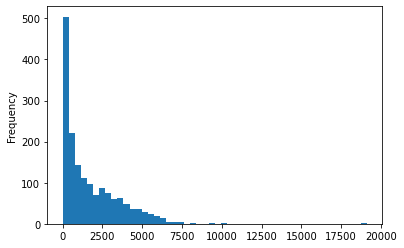

In [29]:
df['Pop_total_40'].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

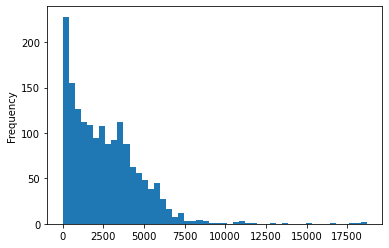

In [30]:
df['Pop_total_50'].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

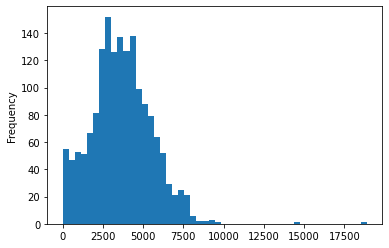

In [31]:
df['Pop_total_60'].plot.hist(bins=50)

It looks like the mean overall population per Census Tract is growing from ~1697 in 1940 to ~3661 in 1960. The histograms show am increase in number of Census tracts with denser populations showing just how intense this population growth was during this post-war time. 

***How does the overall Black population change?***

In [32]:
df['Pop_black_40'].describe()

count    1656.000000
mean       45.414251
std       320.741386
min         0.000000
25%         0.000000
50%         1.000000
75%         5.000000
max      5531.000000
Name: Pop_black_40, dtype: float64

In [33]:
df['Pop_black_50'].describe()

count    1656.000000
mean      129.768720
std       600.536426
min         0.000000
25%         1.000000
50%         3.000000
75%        12.000000
max      7286.000000
Name: Pop_black_50, dtype: float64

In [34]:
df['Pop_black_60'].describe()

count    1656.000000
mean      277.660628
std       873.821753
min         0.000000
25%         0.000000
50%         2.000000
75%        18.000000
max      6528.000000
Name: Pop_black_60, dtype: float64

<AxesSubplot:ylabel='Frequency'>

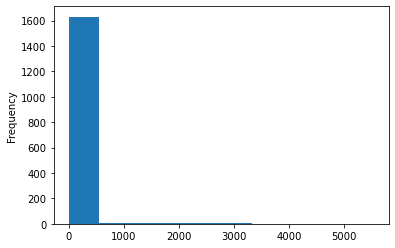

In [35]:
df['Pop_black_40'].plot.hist(bins=10)

<AxesSubplot:ylabel='Frequency'>

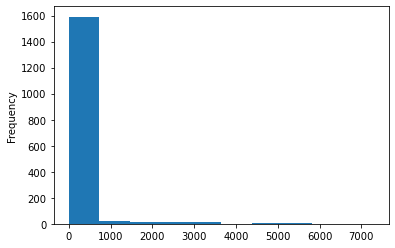

In [36]:
df['Pop_black_50'].plot.hist(bins=10)

<AxesSubplot:ylabel='Frequency'>

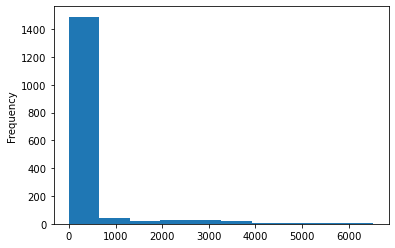

In [37]:
df['Pop_black_60'].plot.hist(bins=10)

Black population continues with the overall trend and grows from an average of ~45 per Census tract in 1940 to ~278 Black residents per Census tract. The histograms show us that there were few Census tracts with dense Black populations and they slightly grew from 1940 to 1960.

# <hl> Check Data for Null/Missing Values

In [38]:
len(df)

1656

In [39]:
df.isna().sum()

AREA            0
PERIMETER       0
Census_tract    0
Pop_total_40    0
Pop_black_40    0
Pop_total_50    0
Pop_black_50    0
Pop_total_60    0
Pop_black_60    0
geometry        0
dtype: int64

Awesome. This means that none of our data has null values. Let's continue exploring this data.

# <hl> Sorting

Based on our previous exploration, ***which Census tracts have the highest Black population?*** In 1940, this will give us a sense of where Black people could live. In 1950 and 1960, this will give us a sense of both where Black people lived after the outlaw of racially restrictive covenants. *What correlations are there with our Green Book data locations?*

In [40]:
#Let's start with 1940.
df_sorted = df.sort_values(by='Pop_black_40',ascending = False)

In [41]:
df_sorted[['Census_tract','Pop_black_40']].head(10)

,Census_tract,Pop_black_40
986,227000,5531
1060,228700,4978
1027,228200,4445
892,226000,4293
1021,228300,3157
1018,228100,2782
1061,228800,2767
989,226700,2669
1094,229400,2347
336,461600,2250


<AxesSubplot:xlabel='Census_tract'>

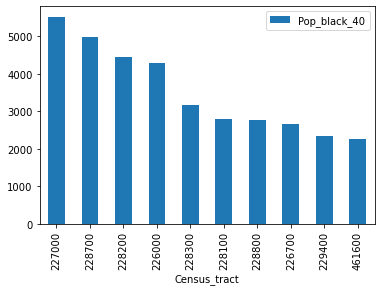

In [42]:
df_sorted.head(10).plot.bar(x='Census_tract',
                            y='Pop_black_40')

<AxesSubplot:title={'center':'Top 10 Census Tracts with Highest Black Population in 1940 Los Angeles County'}, xlabel='Census_tract'>

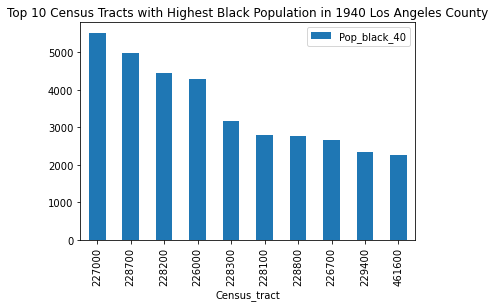

In [43]:
df_sorted.head(10).plot.bar(x='Census_tract',
                            y='Pop_black_40',
                            title='Top 10 Census Tracts with Highest Black Population in 1940 Los Angeles County')

***How does this compare to overall population in 1940?***

In [44]:
df_sorted40 = df.sort_values(by='Pop_total_40',ascending = False)

In [45]:
df_sorted40[['Census_tract','Pop_total_40']].head(10)

,Census_tract,Pop_total_40
892,226000,19107
795,207500,10102
736,207100,9950
846,210000,9326
903,224000,9272
762,207400,8171
528,700600,7571
797,209200,7514
685,211000,7419
904,531100,7334


<AxesSubplot:xlabel='Census_tract'>

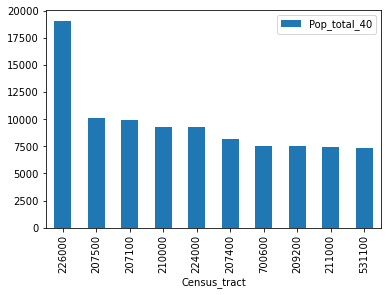

In [46]:
df_sorted40.head(10).plot.bar(x='Census_tract',
                            y='Pop_total_40')

<AxesSubplot:title={'center':'Top 10 Census Tracts with Highest Population in 1940 Los Angeles County'}, xlabel='Census_tract'>

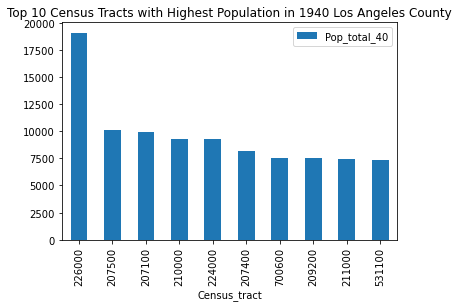

In [47]:
df_sorted40.head(10).plot.bar(x='Census_tract',
                            y='Pop_total_40',
                            title='Top 10 Census Tracts with Highest Population in 1940 Los Angeles County')

The 4th densest Census tract overall, 2260, has the highest Black population. *I wonder where that is.*

Now, let's explore the 1960 data for overall and Black population to see if there are any other connections we can make.

In [48]:
df_sorted60 = df.sort_values(by='Pop_total_60',ascending = False)

In [49]:
df_sorted60[['Census_tract','Pop_total_60']].head(10)

,Census_tract,Pop_total_60
1218,278000,18891
1603,575600,14480
1144,533600,9509
1584,574500,9435
1443,570500,9329
277,139000,9096
1567,572800,8991
260,430301,8696
1352,602600,8589
619,481400,8335


<AxesSubplot:xlabel='Census_tract'>

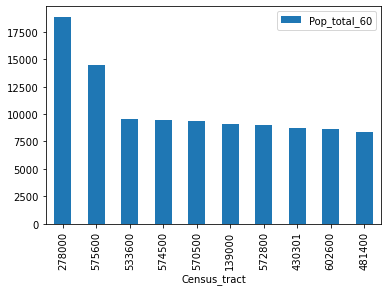

In [50]:
df_sorted60.head(10).plot.bar(x='Census_tract',
                            y='Pop_total_60')

<AxesSubplot:title={'center':'Top 10 Census Tracts with Highest Population in 1960 Los Angeles County'}, xlabel='Census_tract'>

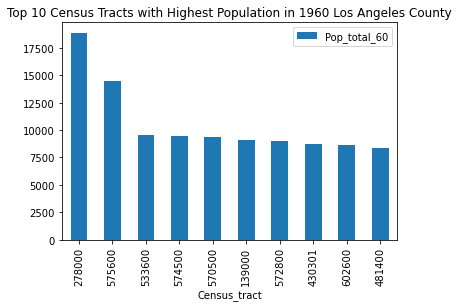

In [51]:
df_sorted60.head(10).plot.bar(x='Census_tract',
                            y='Pop_total_60',
                            title='Top 10 Census Tracts with Highest Population in 1960 Los Angeles County')

By estimate, it appears as though the densest Census tract has changed to 2780 in 1960 and appears slightly less dense than in 1940. Let's explore how the Black population has changed.

In [52]:
df_sorted60b = df.sort_values(by='Pop_black_60',ascending = False)

In [53]:
df_sorted60b[['Census_tract','Pop_black_60']].head(10)

,Census_tract,Pop_black_60
1336,541200,6528
1306,241000,6043
1413,543100,6020
1145,239300,5779
1318,540700,5625
1060,228700,5517
986,227000,5474
956,222000,5308
1008,228400,5134
1335,541300,5082


<AxesSubplot:xlabel='Census_tract'>

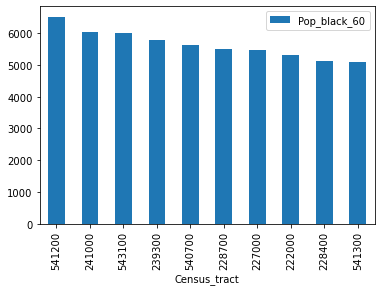

In [54]:
df_sorted60b.head(10).plot.bar(x='Census_tract',
                            y='Pop_black_60')

<AxesSubplot:title={'center':'Top 10 Census Tracts with Highest Population in 1960 Los Angeles County'}, xlabel='Census_tract'>

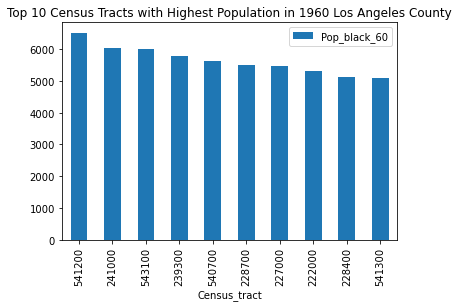

In [55]:
df_sorted60b.head(10).plot.bar(x='Census_tract',
                            y='Pop_black_60',
                            title='Top 10 Census Tracts with Highest Population in 1960 Los Angeles County')

It also appears that many of the Census tracts with the highest Black population have changed and also have reached above 6000 people, denser than in 1940. At a cursory glance, it seems as though many Black residents relocated to other neighborhoods in post-War Los Angeles.

***Where did Black residents move?***

*Should we filter out the census tracts without any residents before moving on to mapping?*

In [56]:
df[df['Pop_total_40']==0]

,AREA,PERIMETER,Census_tract,Pop_total_40,Pop_black_40,Pop_total_50,Pop_black_50,Pop_total_60,Pop_black_60,geometry


In [57]:
df[df['Pop_total_50']==0]

,AREA,PERIMETER,Census_tract,Pop_total_40,Pop_black_40,Pop_total_50,Pop_black_50,Pop_total_60,Pop_black_60,geometry
437,1.298290e+06,5307.05104,320000,11,0,0,0,0,0,"POLYGON ((1968171.033 571314.039, 1968344.649 ..."
1124,8.594322e+05,4053.33209,533500,2862,0,0,0,3851,0,"POLYGON ((1981131.783 554186.123, 1981279.691 ..."
1236,7.991907e+05,3935.96501,242200,3192,410,0,0,4387,3508,"POLYGON ((1977528.006 550300.830, 1977638.934 ..."


In [58]:
df[df['Pop_total_60']==0]

,AREA,PERIMETER,Census_tract,Pop_total_40,Pop_black_40,Pop_total_50,Pop_black_50,Pop_total_60,Pop_black_60,geometry
437,1.298290e+06,5307.05104,320000,11,0,0,0,0,0,"POLYGON ((1968171.033 571314.039, 1968344.649 ..."


**Important Caveat:** Given that we are trying to understand the population change dynamics over a period of time, it isn't smart for us to erase the Census tracts with 0 especially given the population is not consistent in that Census tract over time.

# <hl> Adding Percentage Black Column

Adding this column will give us a better sense of the overall percentage of Black residents to better compare Census tracts.

In [59]:
df['Pct_black_40'] = ''
df['Pct_black_40'] = df['Pop_black_40']/df['Pop_total_40'] *100

In [60]:
df['Pct_black_50'] = ''
df['Pct_black_50'] = df['Pop_black_50']/df['Pop_total_50'] *100

In [61]:
df['Pct_black_60'] = ''
df['Pct_black_60'] = df['Pop_black_60']/df['Pop_total_60'] *100

In [62]:
df.head()

,AREA,PERIMETER,Census_tract,Pop_total_40,Pop_black_40,Pop_total_50,Pop_black_50,Pop_total_60,Pop_black_60,geometry,Pct_black_40,Pct_black_50,Pct_black_60
0,5.110526e+08,97788.60030,900100,615,1,949,34,597,119,"POLYGON ((2010981.306 627195.895, 2010985.562 ...",0.162602,3.582719,19.932998
1,4.139640e+08,112335.98215,900200,1312,2,2822,51,1568,5,"POLYGON ((2020599.176 646773.950, 2020593.421 ...",0.152439,1.807229,0.318878
2,9.627060e+08,143092.75454,901202,1063,1,1308,4,2831,49,"POLYGON ((1970302.753 633587.024, 1970303.702 ...",0.094073,0.305810,1.730837
3,2.129940e+08,60542.54667,900900,1150,3,2612,33,664,101,"POLYGON ((1970159.706 646429.761, 1970530.071 ...",0.260870,1.263400,15.210843
4,5.892047e+07,38184.45935,900300,522,2,1249,17,891,50,"POLYGON ((1987195.131 635140.066, 1987161.766 ...",0.383142,1.361089,5.611672


# <hl> Plotting and Mapping

**Mapping 1940:**

<AxesSubplot:>

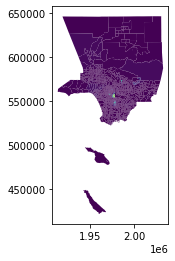

In [63]:
df.plot('Pct_black_40')

At first glance, we can see that Black population in 1940 was solely concentrated to the urban core.

In [64]:
df.geometry

0       POLYGON ((2010981.306 627195.895, 2010985.562 ...
1       POLYGON ((2020599.176 646773.950, 2020593.421 ...
2       POLYGON ((1970302.753 633587.024, 1970303.702 ...
3       POLYGON ((1970159.706 646429.761, 1970530.071 ...
4       POLYGON ((1987195.131 635140.066, 1987161.766 ...
                              ...                        
1651    POLYGON ((1972858.977 524545.755, 1972849.417 ...
1652    POLYGON ((1965591.754 488340.928, 1965611.619 ...
1653    POLYGON ((1954734.236 494638.417, 1954673.281 ...
1654    POLYGON ((1969234.878 484039.140, 1969281.131 ...
1655    POLYGON ((1949084.443 444672.509, 1949184.382 ...
Name: geometry, Length: 1656, dtype: geometry

In [66]:
import folium

In [67]:
latitude = 34.0522
latitude

34.0522

In [68]:
longitude = -118.2437
longitude

-118.2437

In [69]:
#now let's adjust the center of the map to LA
m = folium.Map(location=(latitude, longitude))
m

Let's take a look at the breaks in the map to see what looks best.

<AxesSubplot:>

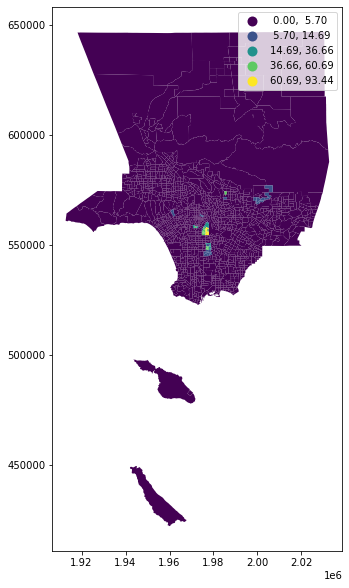

In [70]:
df.plot(figsize=(12,10),
                 column='Pct_black_40',
                 legend=True, 
                 scheme='NaturalBreaks')

<AxesSubplot:>

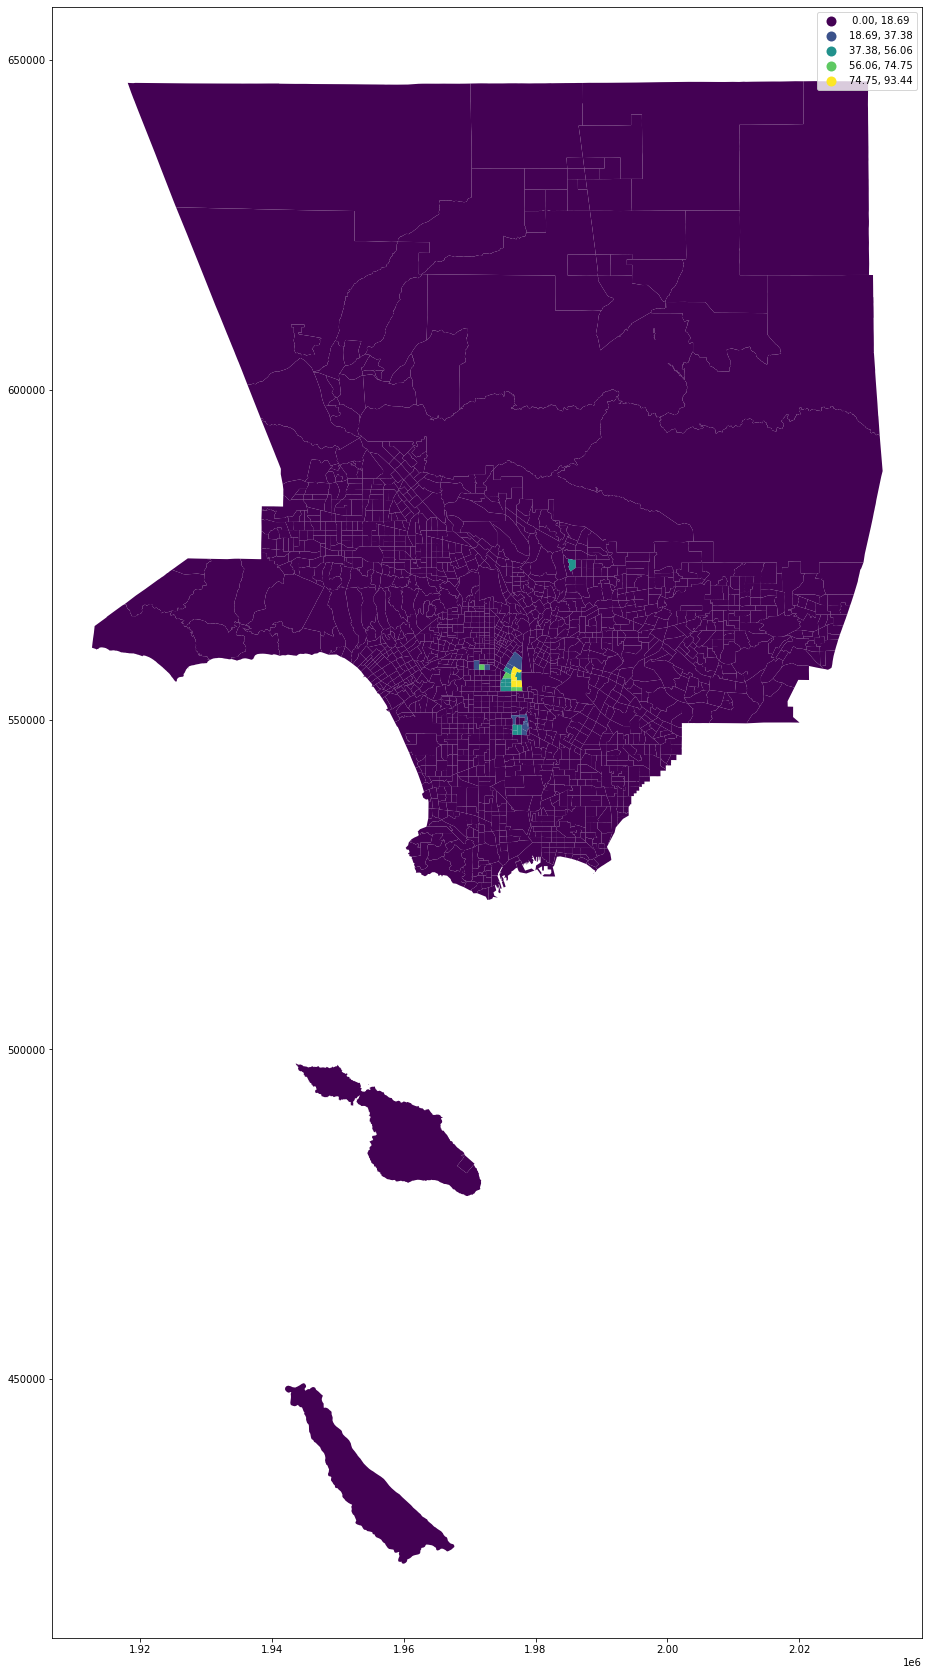

In [71]:
#let's make this one a bit bigger
df.plot(figsize=(35,30),
                 column='Pct_black_40',
                 legend=True, 
                 scheme='equal_interval')

/opt/conda/lib/python3.9/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/opt/conda/lib/python3.9/site-packages/mapclassify/classifiers.py:241: UserWarning: Warning: setting k to 4
  Warn("Warning: setting k to %d" % k_q, UserWarning)


<AxesSubplot:>

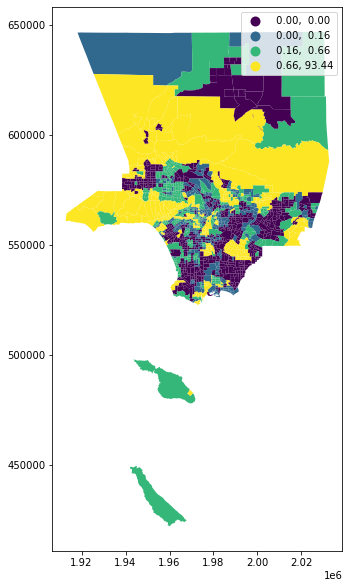

In [72]:
df.plot(figsize=(12,10),
                 column='Pct_black_40',
                 legend=True, 
                 scheme='quantiles')

A map with natural breaks gives us a better sense of the spread of our data, so we'll use that.

# <hl> How does 1940 compare with the 1960 Black population in Los Angeles County?

<AxesSubplot:>

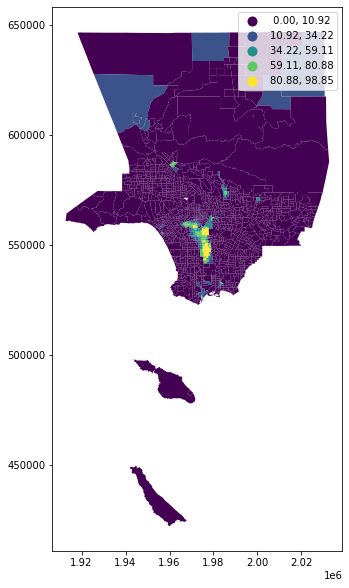

In [73]:
df.plot(figsize=(12,10),
                 column='Pct_black_60',
                 legend=True, 
                 scheme='NaturalBreaks')

Text(0.5, 1.0, 'Percentage of Black Population in Los Angeles County, 1960')

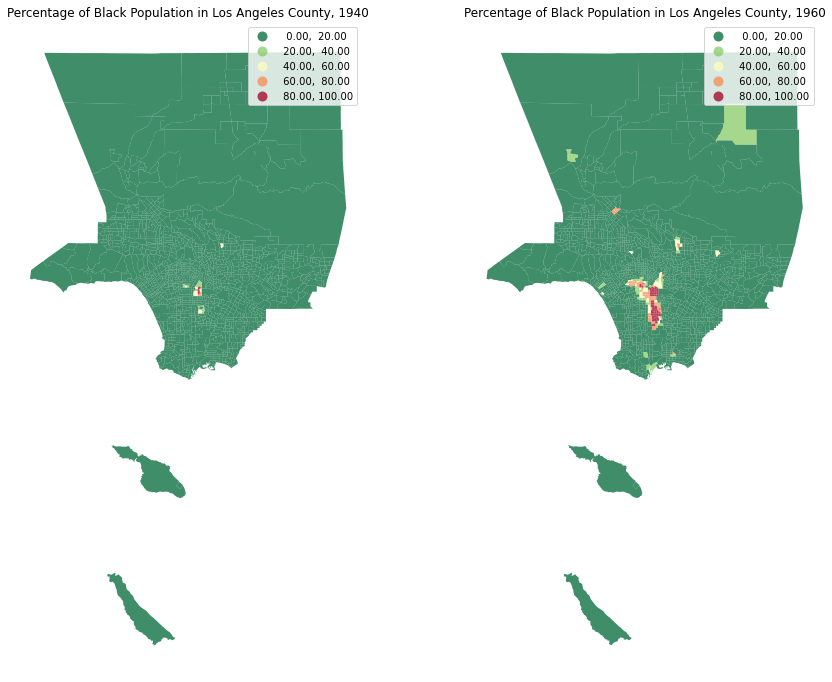

In [74]:
# create the 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

# name each subplot
ax1, ax2 = axs

# 1940 map on the left
df.plot(column='Pct_black_40', 
            cmap='RdYlGn_r', 
            scheme='user_defined',
            classification_kwds={'bins':[20,40,60,80,100]},
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percentage of Black Population in Los Angeles County, 1940")

# 1960 on the right
df.plot(column='Pct_black_60', 
            cmap='RdYlGn_r', 
            scheme='user_defined',
            classification_kwds={'bins':[20,40,60,80,100]},
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, # this assigns the map to the subplot
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percentage of Black Population in Los Angeles County, 1960")

Looks like there was some movement further outside the true urban core from 1940 to 1960, as expected with this shift in legislation. Additionally, there were more Census tracts in 1960 with 80% or higher Black population.

# <hl> How many Census tracts are more than 80% Black in 1940 vs 1960?

In [75]:
df[df.Pct_black_40 > 80]

,AREA,PERIMETER,Census_tract,Pop_total_40,Pop_black_40,Pop_total_50,Pop_black_50,Pop_total_60,Pop_black_60,geometry,Pct_black_40,Pct_black_50,Pct_black_60
986,1.020389e+06,4614.26502,227000,6378,5531,7617,7015,5874,5474,"POLYGON ((1977868.636 557498.771, 1977859.162 ...",86.719975,92.096626,93.190330
1027,7.666893e+05,3885.81299,228200,4757,4445,5665,5520,5047,4989,"POLYGON ((1976315.585 557003.473, 1976528.041 ...",93.441244,97.440424,98.850802
1060,8.071640e+05,3653.23565,228700,5530,4978,6326,6186,5726,5517,"POLYGON ((1976312.820 555916.479, 1976710.096 ...",90.018083,97.786911,96.349983


In [76]:
df[df.Pct_black_40 > 80].count()

AREA            3
PERIMETER       3
Census_tract    3
Pop_total_40    3
Pop_black_40    3
Pop_total_50    3
Pop_black_50    3
Pop_total_60    3
Pop_black_60    3
geometry        3
Pct_black_40    3
Pct_black_50    3
Pct_black_60    3
dtype: int64

There were **3 Census tracts** in 1940 that had 80% or more Black residents.

Let's plot these.

/opt/conda/lib/python3.9/site-packages/mapclassify/classifiers.py:1718: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(ms, UserWarning)
/opt/conda/lib/python3.9/site-packages/mapclassify/classifiers.py:1719: UserWarning: Warning: setting k to 3
  Warn("Warning: setting k to %d" % uvk, UserWarning)


<AxesSubplot:>

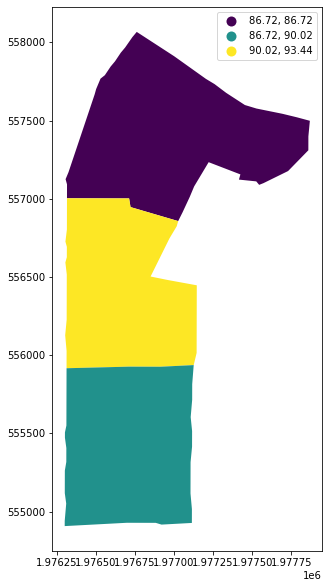

In [77]:
df[df.Pct_black_40 > 80].plot(figsize=(12,10),
                                             column='Pct_black_40',
                                             legend=True, 
                                             scheme='NaturalBreaks')

In [82]:
df[df.Pct_black_60 > 80]

,AREA,PERIMETER,Census_tract,Pop_total_40,Pop_black_40,Pop_total_50,Pop_black_50,Pop_total_60,Pop_black_60,geometry,Pct_black_40,Pct_black_50,Pct_black_60
940,4.872425e+05,3223.19708,222200,2896,1,3358,1350,2954,2366,"POLYGON ((1972266.773 559144.249, 1972368.360 ...",0.034530,40.202501,80.094787
956,1.137556e+06,4468.08000,222000,6274,1754,6679,5388,5951,5308,"POLYGON ((1971462.705 558947.019, 1971462.399 ...",27.956646,80.670759,89.195093
974,6.651638e+05,3251.73003,222500,3721,2172,3866,3051,3292,2894,"POLYGON ((1972264.395 558345.641, 1972273.334 ...",58.371406,78.918779,87.910085
986,1.020389e+06,4614.26502,227000,6378,5531,7617,7015,5874,5474,"POLYGON ((1977868.636 557498.771, 1977859.162 ...",86.719975,92.096626,93.190330
989,7.876128e+05,3692.80158,226700,4957,2669,5852,4475,4853,3920,"POLYGON ((1975440.678 558003.996, 1975643.557 ...",53.843050,76.469583,80.774778
1008,7.523135e+05,4029.24079,228400,6097,510,6450,4914,5696,5134,"POLYGON ((1974820.648 557561.972, 1974848.329 ...",8.364770,76.186047,90.133427
1018,9.832439e+05,4564.80001,228100,4984,2782,6290,5084,4053,3540,"POLYGON ((1977858.951 557310.233, 1977858.713 ...",55.818620,80.826709,87.342709
1021,8.835861e+05,4021.95626,228300,5202,3157,5911,5455,5164,5003,"POLYGON ((1975503.202 557194.127, 1975678.474 ...",60.688197,92.285569,96.882262
1027,7.666893e+05,3885.81299,228200,4757,4445,5665,5520,5047,4989,"POLYGON ((1976315.585 557003.473, 1976528.041 ...",93.441244,97.440424,98.850802
1051,4.467209e+05,2801.64391,228500,2926,1572,3108,2925,3032,2917,"POLYGON ((1974983.304 556219.420, 1975103.399 ...",53.725222,94.111969,96.207124


In [83]:
df[df.Pct_black_60 > 80].count()

AREA            39
PERIMETER       39
Census_tract    39
Pop_total_40    39
Pop_black_40    39
Pop_total_50    39
Pop_black_50    39
Pop_total_60    39
Pop_black_60    39
geometry        39
Pct_black_40    39
Pct_black_50    39
Pct_black_60    39
dtype: int64

In 1960, there were **39 Census tracts** that had 80% or more Black residents, an increase of 36 Census tracts or a **1200% growth rate!**

Let's plot these.

<AxesSubplot:>

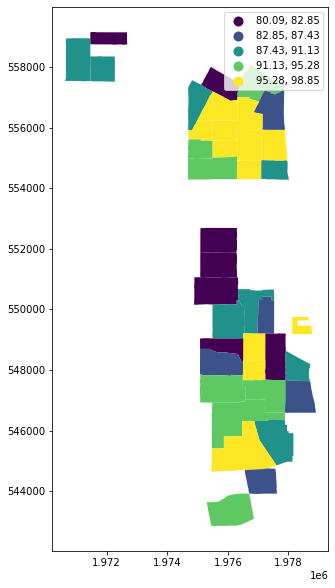

In [84]:
df[df.Pct_black_60 > 80].plot(figsize=(12,10),
                                             column='Pct_black_60',
                                             legend=True, 
                                             scheme='NaturalBreaks')

Let's place these plots side by side to better see the Black population density change from 1940 to 1960.

/opt/conda/lib/python3.9/site-packages/mapclassify/classifiers.py:1718: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(ms, UserWarning)
/opt/conda/lib/python3.9/site-packages/mapclassify/classifiers.py:1719: UserWarning: Warning: setting k to 3
  Warn("Warning: setting k to %d" % uvk, UserWarning)


Text(0.5, 1.0, '80%+ Black Census Tracts in Los Angeles County, 1960')

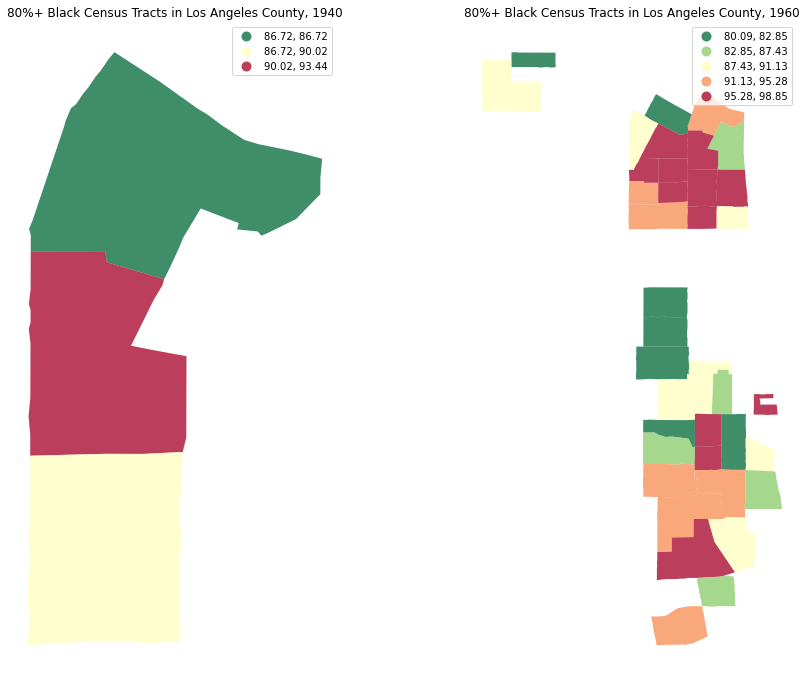

In [85]:
# create the 1x2 subplots
fig, axs2 = plt.subplots(1, 2, figsize=(15, 12))

# name each subplot
ax1a, ax2b = axs2

# 1940 map on the left
df[df.Pct_black_40 > 80].plot(column='Pct_black_40', 
            cmap='RdYlGn_r', 
            scheme='NaturalBreaks',
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1a, # this assigns the map to the subplot,
            legend=True
           )

ax1a.axis("off")
ax1a.set_title("80%+ Black Census Tracts in Los Angeles County, 1940")

# 1960 on the right
df[df.Pct_black_60 > 80].plot(column='Pct_black_60', 
            cmap='RdYlGn_r', 
            scheme='NaturalBreaks',
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2b, # this assigns the map to the subplot
            legend=True
           )

ax2b.axis("off")
ax2b.set_title("80%+ Black Census Tracts in Los Angeles County, 1960")

# <hl> Questions for Further Analysis

*How do you create a side-by-side chloropleth map focusing specifically on Census tracts 80%+ using a Shapefile?*

Below is the code I used that gave me an error.

In [86]:
import folium

In [87]:
#m = folium.Map(location=[34.2,-118.2], 
#               zoom_start = 9,
#               tiles='CartoDB positron', 
#               attribution='CartoDB')
#
# plot chorpleth over the base map
#folium.Choropleth(
#                  geo_data=df, # geo data
#                  data=df, # data          
#                  key_on='fCensus_tract', # key, or merge column
#                  columns=['Census_tract', 'Pct_black_40'], # [key, value]
#                  fill_color='BuPu',
#                  line_weight=0.1, 
#                  fill_opacity=0.8,
#                  line_opacity=0.2, # line opacity (of the border)
#                  legend_name='Population Black (1940 Census Data)').add_to(m)    # name on the legend color bar
# m